In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import entropy
import time
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC

PREPROCESSING

In [53]:
train_df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)
df = pd.concat([train_df, test_df])
print(df)

           id  Gender      Customer Type  Age   Type of Travel     Class  \
0       70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1        5047    Male  disloyal Customer   25  Business travel  Business   
2      110028  Female     Loyal Customer   26  Business travel  Business   
3       24026  Female     Loyal Customer   25  Business travel  Business   
4      119299    Male     Loyal Customer   61  Business travel  Business   
...       ...     ...                ...  ...              ...       ...   
25971   78463    Male  disloyal Customer   34  Business travel  Business   
25972   71167    Male     Loyal Customer   23  Business travel  Business   
25973   37675  Female     Loyal Customer   17  Personal Travel       Eco   
25974   90086    Male     Loyal Customer   14  Business travel  Business   
25975   34799  Female     Loyal Customer   42  Personal Travel       Eco   

       Flight Distance  Inflight wifi service  \
0                  460                

In [54]:
df.isnull().sum()
df = df.dropna()
df.drop(columns=['id'], inplace=True)

In [55]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

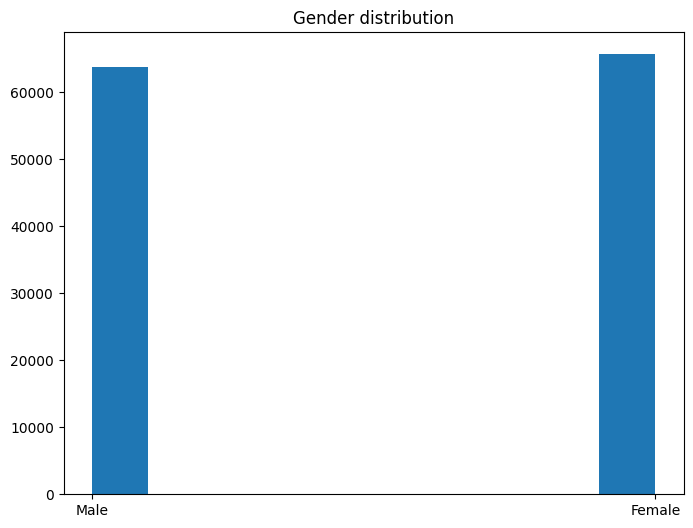

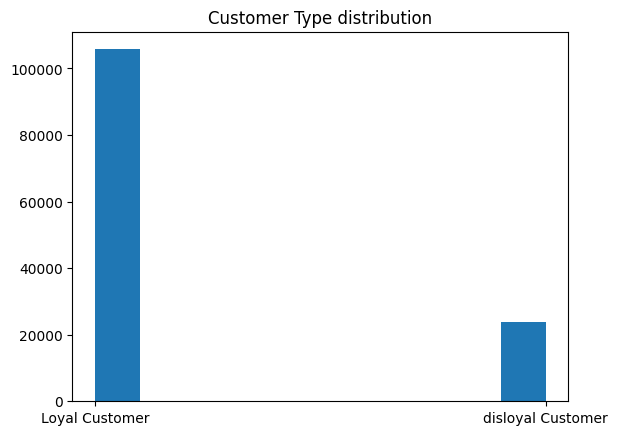

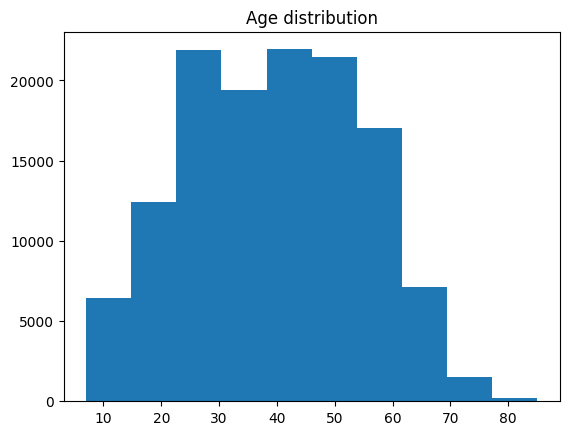

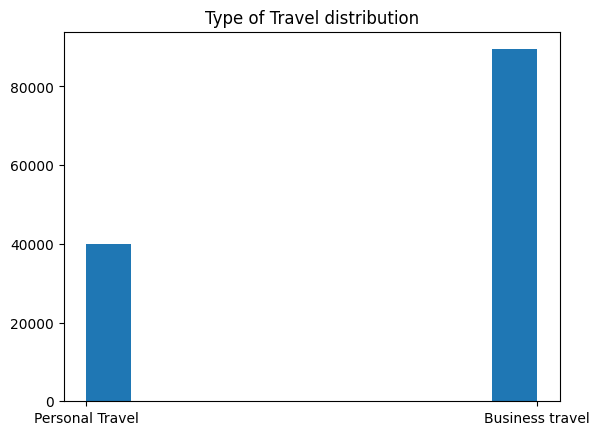

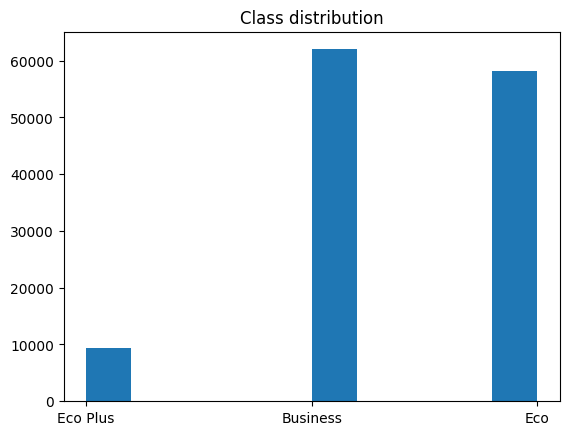

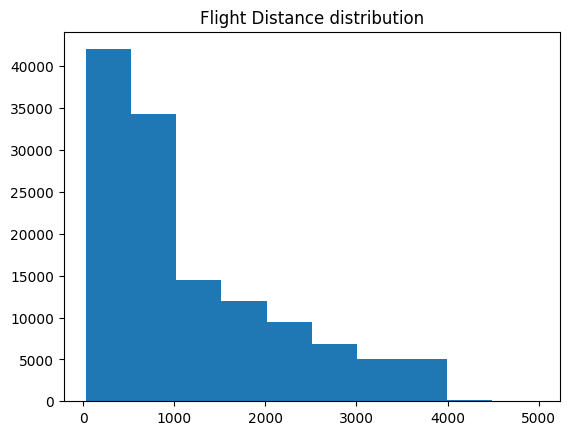

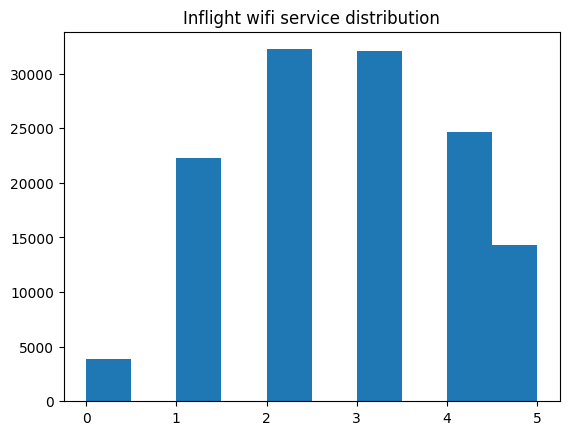

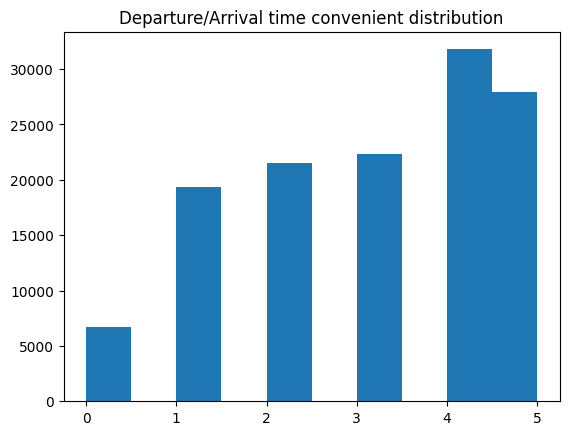

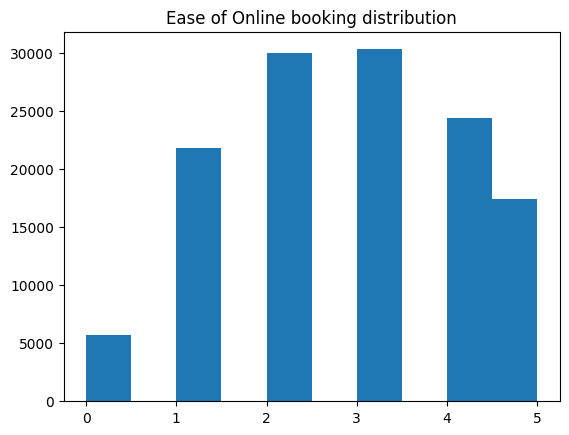

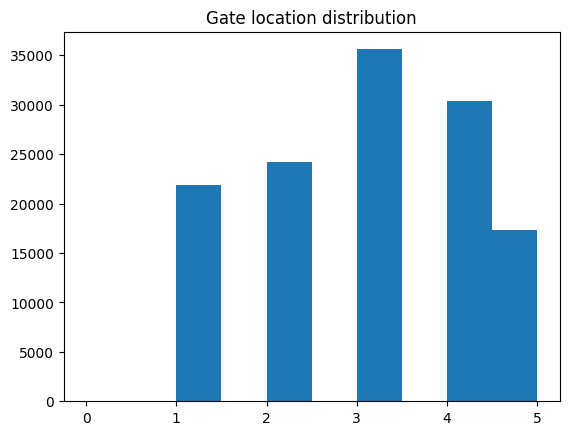

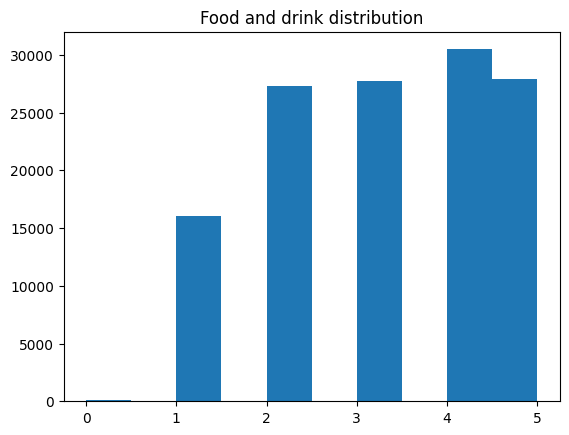

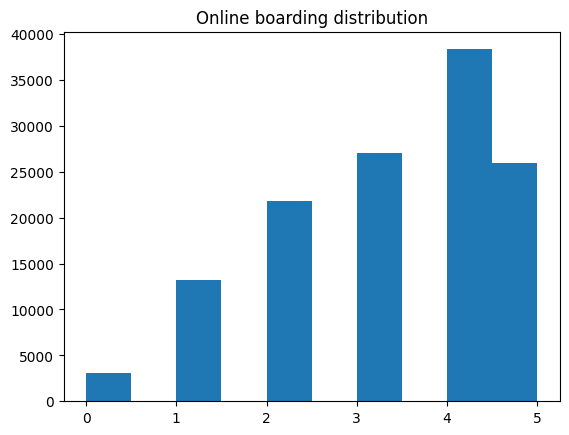

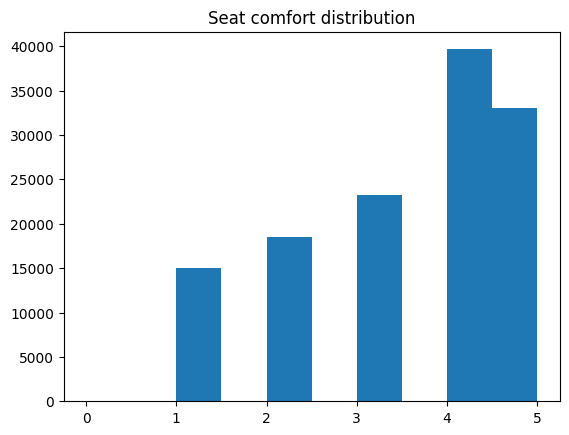

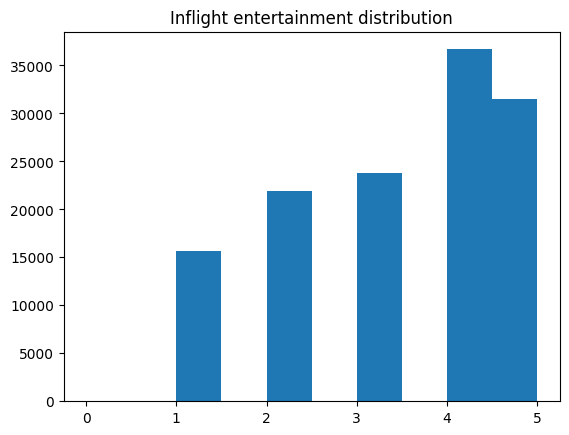

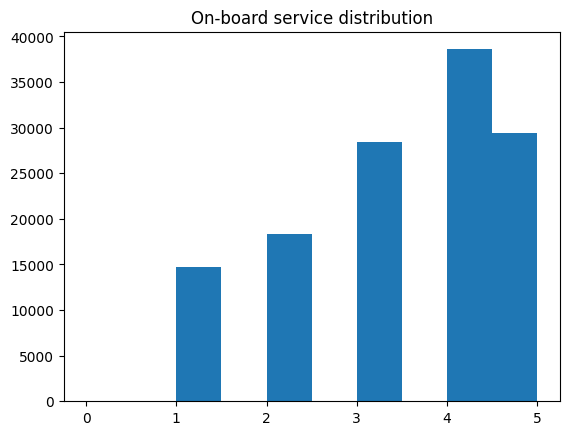

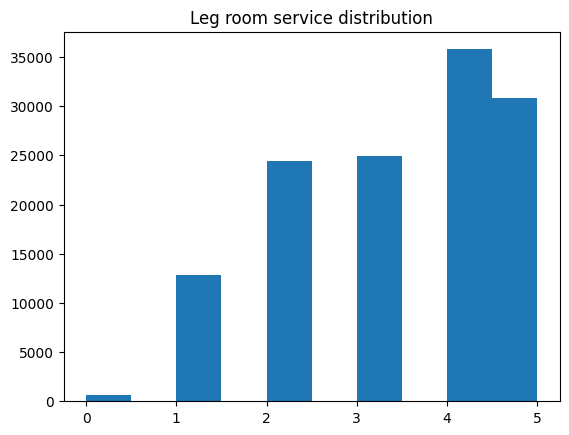

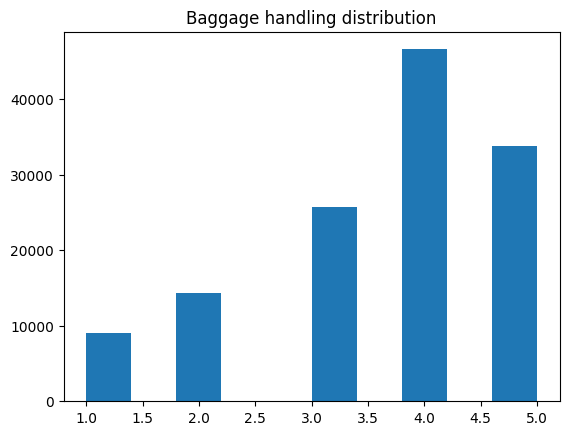

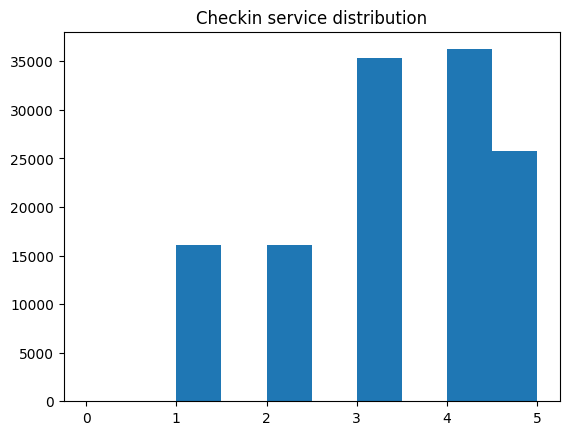

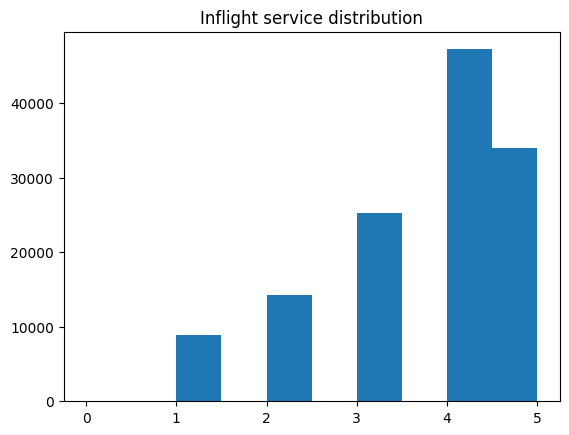

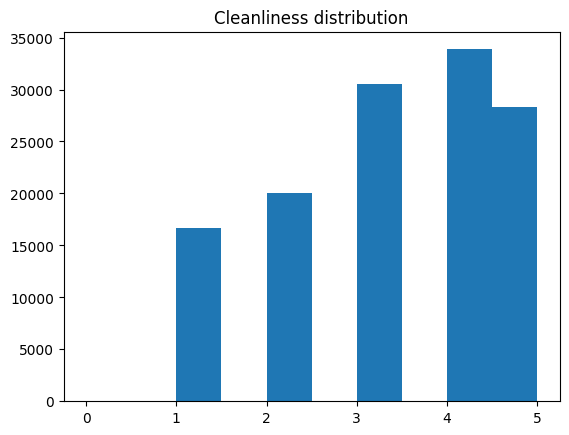

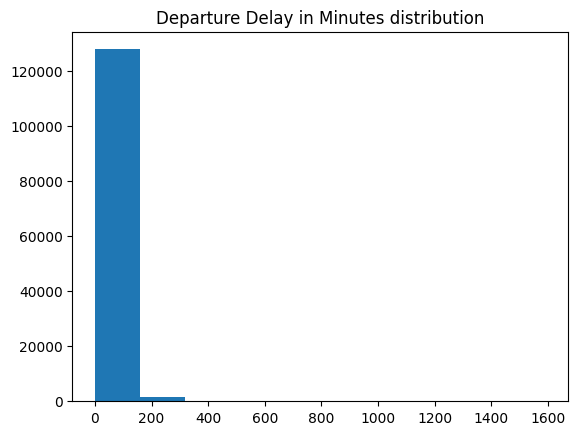

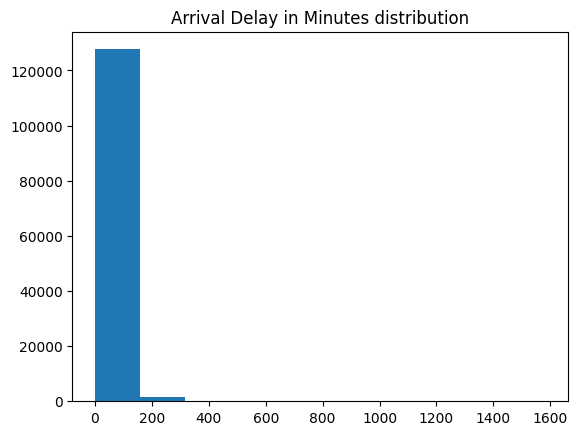

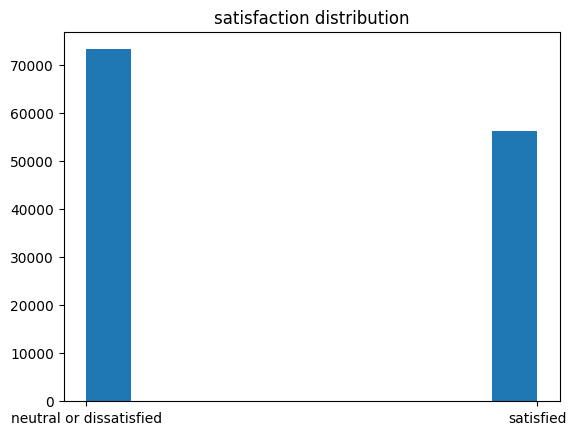

In [56]:
fig = plt.figure(figsize=(8,6))

for column in df.columns:
    plt.hist(df[column])
    plt.title(f'{column} distribution')
    plt.show()

In [57]:
print(df.dtypes)

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [58]:
ordinal_columns = ['Gender', 'Customer Type', 'satisfaction', 'Class']
ohe_columns = ['Type of Travel']

for column in ordinal_columns:
    print(f'{column}', df[column].values)

Gender ['Male' 'Male' 'Female' ... 'Female' 'Male' 'Female']
Customer Type ['Loyal Customer' 'disloyal Customer' 'Loyal Customer' ...
 'Loyal Customer' 'Loyal Customer' 'Loyal Customer']
satisfaction ['neutral or dissatisfied' 'neutral or dissatisfied' 'satisfied' ...
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied']
Class ['Eco Plus' 'Business' 'Business' ... 'Eco' 'Business' 'Eco']


In [59]:
gender_order = ['Female', 'Male']
customer_type_order = ['disloyal Customer', 'Loyal Customer']
satisfaction_order = ['neutral or dissatisfied', 'satisfied']
class_order = ['Eco', 'Eco Plus', 'Business']
orders = [gender_order, customer_type_order, satisfaction_order, class_order]
print(orders)

[['Female', 'Male'], ['disloyal Customer', 'Loyal Customer'], ['neutral or dissatisfied', 'satisfied'], ['Eco', 'Eco Plus', 'Business']]


In [60]:
oe = OrdinalEncoder(categories=orders)
oe.fit_transform(df[ordinal_columns])
df[ordinal_columns] = oe.transform(df[ordinal_columns])

In [61]:
df = pd.get_dummies(df, columns=ohe_columns, drop_first=True)

In [62]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Type of Travel_Personal Travel'],
      dtype='object')

In [63]:
for column in ordinal_columns:
    print(f'{column}', df[column].values)

Gender [1. 1. 0. ... 0. 1. 0.]
Customer Type [1. 0. 1. ... 1. 1. 1.]
satisfaction [0. 0. 1. ... 0. 1. 0.]
Class [1. 2. 2. ... 0. 2. 0.]


In [64]:
print(df)
encoded_df = df.copy()

       Gender  Customer Type  Age  Class  Flight Distance  \
0         1.0            1.0   13    1.0              460   
1         1.0            0.0   25    2.0              235   
2         0.0            1.0   26    2.0             1142   
3         0.0            1.0   25    2.0              562   
4         1.0            1.0   61    2.0              214   
...       ...            ...  ...    ...              ...   
25971     1.0            0.0   34    2.0              526   
25972     1.0            1.0   23    2.0              646   
25973     0.0            1.0   17    0.0              828   
25974     1.0            1.0   14    2.0             1127   
25975     0.0            1.0   42    0.0              264   

       Inflight wifi service  Departure/Arrival time convenient  \
0                          3                                  4   
1                          3                                  2   
2                          2                                  2   

In [65]:
#All features dataset
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
print(y.value_counts(normalize=True))


satisfaction
0.0    0.565501
1.0    0.434499
Name: proportion, dtype: float64


In [67]:
X_encoded = encoded_df.drop(columns=['satisfaction'])

entropy_values = {}

for col in X_encoded.columns:
    probs = X_encoded[col].value_counts(normalize=True)
    ent = entropy(probs, base=2)
    entropy_values[col] = ent

entropy_df = pd.DataFrame(list(entropy_values.items()), columns=['Feature', 'Entropy'])
entropy_df = entropy_df.sort_values(by='Entropy', ascending=False)

print(entropy_df)

                              Feature    Entropy
4                     Flight Distance  10.666699
2                                 Age   5.890898
20           Arrival Delay in Minutes   3.791905
19         Departure Delay in Minutes   3.745854
6   Departure/Arrival time convenient   2.471671
7              Ease of Online booking   2.451599
5               Inflight wifi service   2.394260
10                    Online boarding   2.353864
9                      Food and drink   2.300487
14                   Leg room service   2.284267
8                       Gate location   2.277833
18                        Cleanliness   2.276249
12             Inflight entertainment   2.264212
13                   On-board service   2.242841
16                    Checkin service   2.236192
11                       Seat comfort   2.232403
15                   Baggage handling   2.118570
17                   Inflight service   2.112213
3                               Class   1.301827
0                   

<BarContainer object of 22 artists>

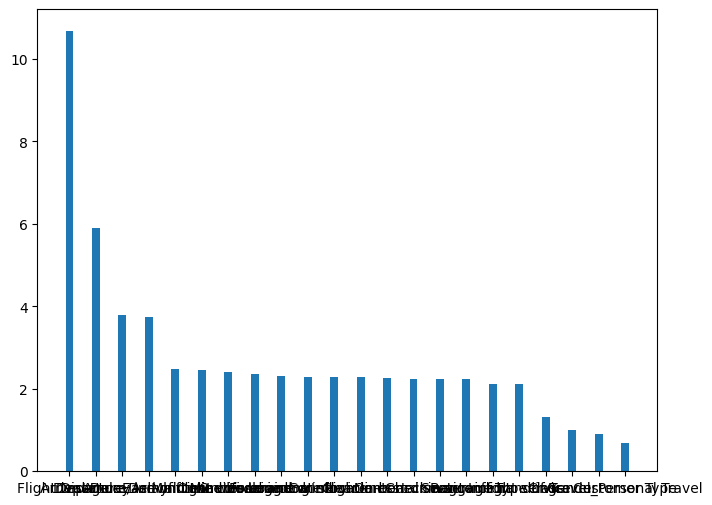

In [68]:
fig = plt.figure(figsize=(8,6))
plt.bar(entropy_df['Feature'].array, entropy_df['Entropy'], 0.3)

In [69]:
threshold = entropy_df['Entropy'].quantile(0.4)
top_entropy_features = entropy_df[entropy_df['Entropy'] >= threshold]['Feature'].tolist()
print(top_entropy_features)
encoded_df[top_entropy_features].head()

['Flight Distance', 'Age', 'Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Inflight wifi service', 'Online boarding', 'Food and drink', 'Leg room service', 'Gate location', 'Cleanliness', 'Inflight entertainment']


,Flight Distance,Age,Arrival Delay in Minutes,Departure Delay in Minutes,Departure/Arrival time convenient,Ease of Online booking,Inflight wifi service,Online boarding,Food and drink,Leg room service,Gate location,Cleanliness,Inflight entertainment
0,460,13,18.0,25,4,3,3,3,5,3,1,5,5
1,235,25,6.0,1,2,3,3,3,1,5,3,1,1
2,1142,26,0.0,0,2,2,2,5,5,3,2,5,5
3,562,25,9.0,11,5,5,2,2,2,5,5,2,2
4,214,61,0.0,0,3,3,3,5,4,4,3,3,3


In [70]:
X_entropy = encoded_df[top_entropy_features]
y_entropy = encoded_df['satisfaction']
X_entropy_train, X_entropy_test, y_entropy_train, y_entropy_test = train_test_split(X_entropy, y_entropy, test_size=0.2, random_state=42)

In [71]:
scaler = MinMaxScaler()
X_entropy_train_scaled = scaler.fit_transform(X_entropy_train)
X_entropy_test_scaled = scaler.transform(X_entropy_test)

In [72]:
# Drop target column
X_encoded = encoded_df.drop(columns=['satisfaction'])
y = encoded_df['satisfaction']  # your binary target

# Calculate Mutual Information scores
mi_scores = mutual_info_classif(X_encoded, y, discrete_features='auto', random_state=42)

# Put into DataFrame
mi_df = pd.DataFrame({'Feature': X_encoded.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Print scores
print(mi_df)

# Select top 60% features using quantile threshold
threshold = mi_df['MI Score'].quantile(0.4)
top_mi_features = mi_df[mi_df['MI Score'] >= threshold]['Feature'].tolist()

# Print selected features
print(top_mi_features)

# Preview the selected subset
X_mi = encoded_df[top_mi_features]
y_mi = encoded_df['satisfaction']
X_mi_train, X_mi_test, y_mi_train, y_mi_test = train_test_split(X_mi, y_mi, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_mi_train_scaled = scaler.fit_transform(X_mi_train)
X_mi_test_scaled = scaler.transform(X_mi_test)

                              Feature  MI Score
10                    Online boarding  0.215466
5               Inflight wifi service  0.166829
3                               Class  0.144068
21     Type of Travel_Personal Travel  0.119142
12             Inflight entertainment  0.096624
11                       Seat comfort  0.081585
14                   Leg room service  0.064030
4                     Flight Distance  0.060911
13                   On-board service  0.060844
7              Ease of Online booking  0.056307
18                        Cleanliness  0.052204
2                                 Age  0.046657
17                   Inflight service  0.045914
15                   Baggage handling  0.044281
16                    Checkin service  0.034347
9                      Food and drink  0.030043
1                       Customer Type  0.029510
8                       Gate location  0.015239
0                              Gender  0.010932
19         Departure Delay in Minutes  0

In [73]:
print(encoded_df[top_mi_features].shape)
print(encoded_df.shape)

(129487, 13)
(129487, 23)


In [74]:
#Log reg
logreg = LogisticRegression()

logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

In [75]:
logreg_entropy = LogisticRegression()

logreg_entropy.fit(X_entropy_train_scaled, y_entropy_train)
y_entropy_pred = logreg_entropy.predict(X_entropy_test_scaled)

In [76]:
logreg_mi = LogisticRegression()

logreg_mi.fit(X_mi_train_scaled, y_mi_train)
y_mi_pred = logreg_mi.predict(X_mi_test_scaled)

In [77]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

accuracy_entropy = accuracy_score(y_entropy_test, y_entropy_pred)
f1_entropy = f1_score(y_entropy_test, y_entropy_pred)
recall_entropy = recall_score(y_entropy_test, y_entropy_pred)

accuracy_mi = accuracy_score(y_mi_test, y_mi_pred)
f1_mi = f1_score(y_mi_test, y_mi_pred)
recall_mi = recall_score(y_mi_test, y_mi_pred)

In [78]:
print('LOGISTIC REGRESSION: ')
print('\nAll features(21):')
print(f'accuracy = {accuracy}')
print(f'f1 = {f1}')
print(f'recall = {recall}')
print('\nEntropy based features(13):')
print(f'accuracy_entropy = {accuracy_entropy}')
print(f'f1_entropy = {f1_entropy}')
print(f'recall_entropy = {recall_entropy}')
print('\nMI based features(13):')
print(f'accuracy_mi = {accuracy_mi}')
print(f'f1_mi = {f1_mi}')
print(f'recall_mi = {recall_mi}')

LOGISTIC REGRESSION: 

All features(24):
accuracy = 0.8746235230519731
f1 = 0.8528171887040479
recall = 0.8376669634906501

Entropy based features(14):
accuracy_entropy = 0.8231137539578346
f1_entropy = 0.792517777073237
recall_entropy = 0.779073909171861

MI based features(14):
accuracy_mi = 0.8559348212217159
f1_mi = 0.8318990763685514
recall_mi = 0.8220837043633126


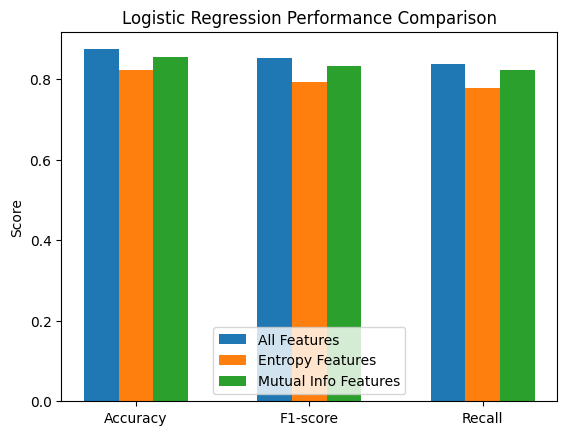

In [79]:
labels = ['Accuracy', 'F1-score', 'Recall']
all_feat = [accuracy, f1, recall]
entropy_feat = [accuracy_entropy, f1_entropy, recall_entropy]
mi_feat = [accuracy_mi, f1_mi, recall_mi]

x = np.arange(len(labels))
width = 0.2

plt.bar(x - width, all_feat, width, label='All Features')
plt.bar(x, entropy_feat, width, label='Entropy Features')
plt.bar(x + width, mi_feat, width, label='Mutual Info Features')
plt.xticks(x, labels)
plt.ylabel('Score')
plt.title('Logistic Regression Performance Comparison')
plt.legend()
plt.show()


Training time (all features): 0.1620 s
Training time (entropy features): 0.0584 s
Training time (MI features): 0.0468 s


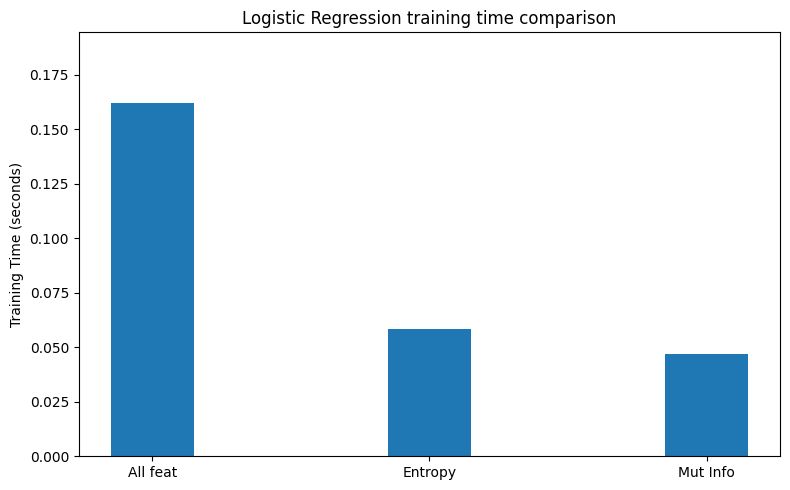

In [80]:
# 1. Full feature model
start = time.time()
logreg.fit(X_train_scaled, y_train)
end = time.time()
train_time_all = end - start

# 2. Entropy-selected features
start = time.time()
logreg.fit(X_entropy_train_scaled, y_entropy_train)
end = time.time()
train_time_entropy = end - start

# 3. MI-selected features
start = time.time()
logreg.fit(X_mi_train_scaled, y_mi_train)
end = time.time()
train_time_mi = end - start

print(f'Training time (all features): {train_time_all:.4f} s')
print(f'Training time (entropy features): {train_time_entropy:.4f} s')
print(f'Training time (MI features): {train_time_mi:.4f} s')

times = [train_time_all, train_time_entropy, train_time_mi]

plt.figure(figsize=(8, 5))

plt.ylabel('Training Time (seconds)')
plt.title('Logistic Regression training time comparison')
plt.bar(['All feat', 'Entropy', 'Mut Info'], times, 0.3)
plt.ylim(0, max(times) * 1.2)  # add headroom above highest bar
plt.tight_layout()
plt.show()

In [81]:
#Decision Tree all features
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)

In [82]:
#Decision Tree entropy based
dt_entropy = DecisionTreeClassifier()
dt_entropy.fit(X_entropy_train_scaled, y_entropy_train)
y_entropy_pred = dt_entropy.predict(X_entropy_test_scaled)

In [83]:
#Decision Tree mi based
dt_mi = DecisionTreeClassifier()
dt_mi.fit(X_mi_train_scaled, y_mi_train)
y_mi_pred = dt_mi.predict(X_mi_test_scaled)

In [84]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

accuracy_entropy = accuracy_score(y_entropy_test, y_entropy_pred)
f1_entropy = f1_score(y_entropy_test, y_entropy_pred)
recall_entropy = recall_score(y_entropy_test, y_entropy_pred)

accuracy_mi = accuracy_score(y_mi_test, y_mi_pred)
f1_mi = f1_score(y_mi_test, y_mi_pred)
recall_mi = recall_score(y_mi_test, y_mi_pred)

In [85]:
print('Decision Tree:')
print('\nAll features(24):')
print(f'accuracy = {accuracy}')
print(f'f1 = {f1}')
print(f'recall = {recall}')
print('\nEntropy based features(14):')
print(f'accuracy_entropy = {accuracy_entropy}')
print(f'f1_entropy = {f1_entropy}')
print(f'recall_entropy = {recall_entropy}')
print('\nMI based features(14):')
print(f'accuracy_mi = {accuracy_mi}')
print(f'f1_mi = {f1_mi}')
print(f'recall_mi = {recall_mi}')

Decision Tree:

All features(24):
accuracy = 0.9447833809560584
f1 = 0.9365347061956328
recall = 0.9395369545859306

Entropy based features(14):
accuracy_entropy = 0.9111514402656575
f1_entropy = 0.8979827089337176
recall_entropy = 0.9017809439002672

MI based features(14):
accuracy_mi = 0.9279867171210132
f1_mi = 0.9173132343161161
recall_mi = 0.921193232413179


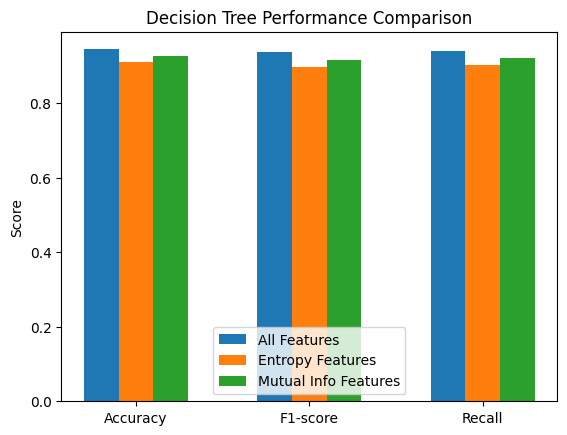

In [86]:
labels = ['Accuracy', 'F1-score', 'Recall']
all_feat = [accuracy, f1, recall]
entropy_feat = [accuracy_entropy, f1_entropy, recall_entropy]
mi_feat = [accuracy_mi, f1_mi, recall_mi]

x = np.arange(len(labels))
width = 0.2

plt.bar(x - width, all_feat, width, label='All Features')
plt.bar(x, entropy_feat, width, label='Entropy Features')
plt.bar(x + width, mi_feat, width, label='Mutual Info Features')
plt.xticks(x, labels)
plt.ylabel('Score')
plt.title('Decision Tree Performance Comparison')
plt.legend()
plt.show()


Training time (all features): 0.4173 s
Training time (entropy features): 0.3456 s
Training time (MI features): 0.2774 s


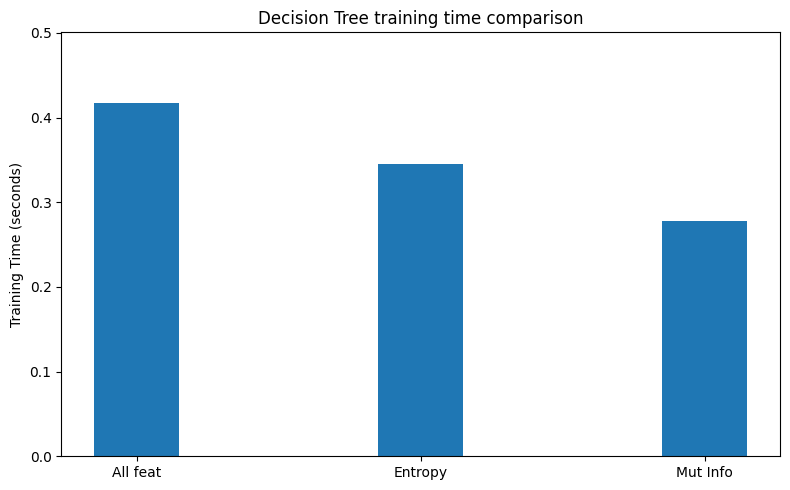

In [87]:
# 1. Full feature model
start = time.time()
dt.fit(X_train_scaled, y_train)
end = time.time()
train_time_all = end - start

# 2. Entropy-selected features
start = time.time()
dt.fit(X_entropy_train_scaled, y_entropy_train)
end = time.time()
train_time_entropy = end - start

# 3. MI-selected features
start = time.time()
dt.fit(X_mi_train_scaled, y_mi_train)
end = time.time()
train_time_mi = end - start

print(f'Training time (all features): {train_time_all:.4f} s')
print(f'Training time (entropy features): {train_time_entropy:.4f} s')
print(f'Training time (MI features): {train_time_mi:.4f} s')

times = [train_time_all, train_time_entropy, train_time_mi]

plt.figure(figsize=(8, 5))

plt.ylabel('Training Time (seconds)')
plt.title('Decision Tree training time comparison')
plt.bar(['All feat', 'Entropy', 'Mut Info'], times, 0.3)
plt.ylim(0, max(times) * 1.2)  # add headroom above highest bar
plt.tight_layout()
plt.show()

SVM

In [88]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

rf_mi = RandomForestClassifier()
rf_mi.fit(X_mi_train_scaled, y_mi_train)
y_mi_pred = rf_mi.predict(X_mi_test_scaled)

rf_entropy = RandomForestClassifier()
rf_entropy.fit(X_entropy_train_scaled, y_entropy_train)
y_entropy_pred = rf_entropy.predict(X_entropy_test_scaled)

In [89]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

accuracy_entropy = accuracy_score(y_entropy_test, y_entropy_pred)
f1_entropy = f1_score(y_entropy_test, y_entropy_pred)
recall_entropy = recall_score(y_entropy_test, y_entropy_pred)

accuracy_mi = accuracy_score(y_mi_test, y_mi_pred)
f1_mi = f1_score(y_mi_test, y_mi_pred)
recall_mi = recall_score(y_mi_test, y_mi_pred)

In [90]:
print('Random forest:')
print('\nAll features(24):')
print(f'accuracy = {accuracy}')
print(f'f1 = {f1}')
print(f'recall = {recall}')
print('\nEntropy based features(14):')
print(f'accuracy_entropy = {accuracy_entropy}')
print(f'f1_entropy = {f1_entropy}')
print(f'recall_entropy = {recall_entropy}')
print('\nMI based features(14):')
print(f'accuracy_mi = {accuracy_mi}')
print(f'f1_mi = {f1_mi}')
print(f'recall_mi = {recall_mi}')

Random forest:

All features(24):
accuracy = 0.9617344968723454
f1 = 0.9551887858919286
recall = 0.9405164737310775

Entropy based features(14):
accuracy_entropy = 0.9353618040003089
f1_entropy = 0.9244107287997833
recall_entropy = 0.9114870881567231

MI based features(14):
accuracy_mi = 0.9489922001698973
f1_mi = 0.9404015339499211
recall_mi = 0.9280498664292075


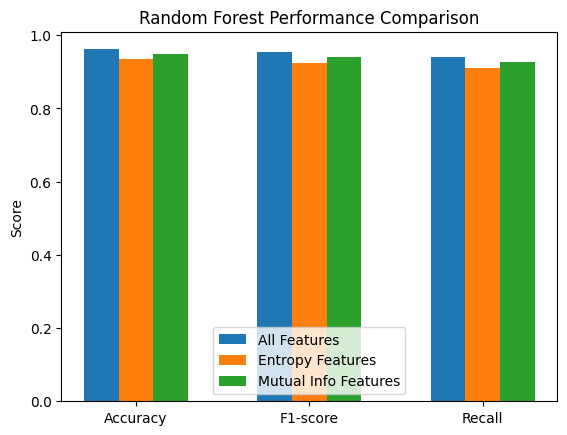

In [91]:
labels = ['Accuracy', 'F1-score', 'Recall']
all_feat = [accuracy, f1, recall]
entropy_feat = [accuracy_entropy, f1_entropy, recall_entropy]
mi_feat = [accuracy_mi, f1_mi, recall_mi]

x = np.arange(len(labels))
width = 0.2

plt.bar(x - width, all_feat, width, label='All Features')
plt.bar(x, entropy_feat, width, label='Entropy Features')
plt.bar(x + width, mi_feat, width, label='Mutual Info Features')
plt.xticks(x, labels)
plt.ylabel('Score')
plt.title('Random Forest Performance Comparison')
plt.legend()
plt.show()

Training time (all features): 0.4167 s
Training time (entropy features): 0.3497 s
Training time (MI features): 0.2738 s


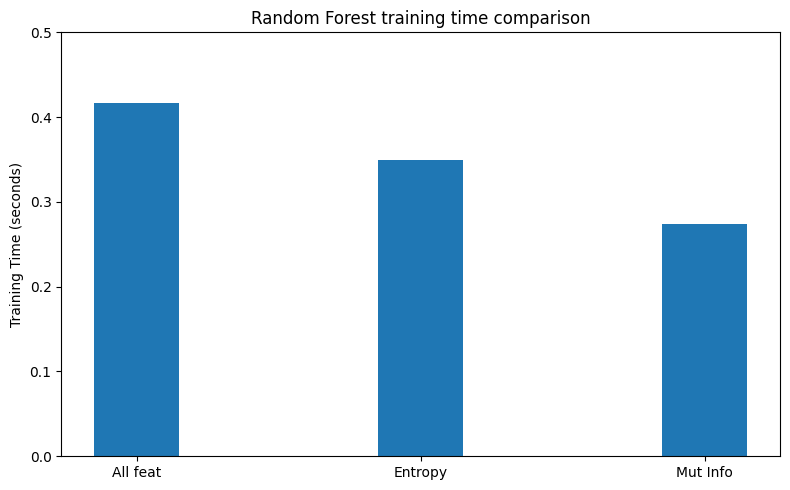

In [92]:
# 1. Full feature model
start = time.time()
dt.fit(X_train_scaled, y_train)
end = time.time()
train_time_all = end - start

# 2. Entropy-selected features
start = time.time()
dt.fit(X_entropy_train_scaled, y_entropy_train)
end = time.time()
train_time_entropy = end - start

# 3. MI-selected features
start = time.time()
dt.fit(X_mi_train_scaled, y_mi_train)
end = time.time()
train_time_mi = end - start

print(f'Training time (all features): {train_time_all:.4f} s')
print(f'Training time (entropy features): {train_time_entropy:.4f} s')
print(f'Training time (MI features): {train_time_mi:.4f} s')

times = [train_time_all, train_time_entropy, train_time_mi]

plt.figure(figsize=(8, 5))

plt.ylabel('Training Time (seconds)')
plt.title('Random Forest training time comparison')
plt.bar(['All feat', 'Entropy', 'Mut Info'], times, 0.3)
plt.ylim(0, max(times) * 1.2)  # add headroom above highest bar
plt.tight_layout()
plt.show()